# Housing prices - Data Analysis and Predicting Market Value

### Objective is to explore, understand the dataset. Process and prepare to apply machine learning model(s) to predict the market value (price)

### Import necessary libraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Read dataset into notebook and display it

In [149]:
data = pd.read_csv('regression_data.csv')
data.head(3)

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000

### Check number of rows (entries) by columns

In [150]:
data.shape

(21597, 21)

### columns meaning https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [151]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

a peek in column names - they all look good no processing needed

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [153]:
data.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787  98077.951845   
std      827.759761     442.667800     29.375234    401.821438     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04  
mean      47.560093   -122.213982    1986.620318   12758.283512  5.402966e+05  
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05  
min       47.155900   -122.519000     399.000000     651.000000  7.800000e+04  
25%       47.471100   -122.328000    1490.000000    5100.000000  3.220000e+05  
50%       47.571800   -122.231000    1840.000000    7620.000000  4.500000e+05  
75%       47.678000   -122.125000    2360.000000   10083.000000  6.450000e+05  
max       47.777600   -121.315000    6210.000000  871200.000000  7.700000e+06

### Check duplicates and deal with duplicates (based on asumtion that 'id' is a unique entry representing a housing unit)

In [154]:
data[data.duplicated(['id'], keep=False)]

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  \
93     6021501535   7/25/14         3       1.50         1580      5000   
94     6021501535  12/23/14         3       1.50         1580      5000   
313    4139480200   6/18/14         4       3.25         4290     12103   
314    4139480200   12/9/14         4       3.25         4290     12103   
324    7520000520    9/5/14         2       1.00         1240     12092   
...           ...       ...       ...        ...          ...       ...   
20654  8564860270   3/30/15         4       2.50         2680      5539   
20763  6300000226   6/26/14         4       1.00         1200      2171   
20764  6300000226    5/4/15         4       1.00         1200      2171   
21564  7853420110   10/3/14         3       3.00         2780      6000   
21565  7853420110    5/4/15         3       3.00         2780      6000   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
93        1.0           0     0          3      8        1290            290   
94        1.0           0     0          3      8        1290            290   
313       1.0           0     3          3     11        2690           1600   
314       1.0           0     3          3     11        2690           1600   
324       1.0           0     0          3      6         960            280   
...       ...         ...   ...        ...    ...         ...            ...   
20654     2.0           0     0          3      8        2680              0   
20763     1.5           0     0          3      7        1200              0   
20764     1.5           0     0          3      7        1200              0   
21564     2.0           0     0          3      9        2780              0   
21565     2.0           0     0          3      9        2780              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
93         1939             0    98117  47.6870 -122.386           1570   
94         1939             0    98117  47.6870 -122.386           1570   
313        1997             0    98006  47.5503 -122.102           3860   
314        1997             0    98006  47.5503 -122.102           3860   
324        1922          1984    98146  47.4957 -122.352           1820   
...         ...           ...      ...      ...      ...            ...   
20654      2013             0    98045  47.4759 -121.734           2680   
20763      1933             0    98133  47.7076 -122.342           1130   
20764      1933             0    98133  47.7076 -122.342           1130   
21564      2013             0    98065  47.5184 -121.886           2850   
21565      2013             0    98065  47.5184 -121.886           2850   

       sqft_lot15    price  
93           4500   430000  
94           4500   700000  
313         11244  1380000  
314         11244  1400000  
324          7460   232000  
...           ...      ...  
20654        5992   502000  
20763        1598   240000  
20764        1598   380000  
21564        6000   594866  
21565        6000   625000  

[353 rows x 21 columns]

#### Although duplicates are spotted, I will keep entries as they have unique values in other columns.
#### One would need to know the dataset better to see how how data is collected to determine if these duplicates are actual duplicates.

In [155]:
data = data.drop(['id'], axis=1)
data.head(2)

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  10/13/14         3       1.00         1180      5650     1.0           0   
1   12/9/14         3       2.25         2570      7242     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  
0    98178  47.5112 -122.257           1340        5650  221900  
1    98125  47.7210 -122.319           1690        7639  538000

Dropping 'id' column as it servers no purpose

See to combine 'bathrooms' and 'bedrooms' columns as follows:

<AxesSubplot:>

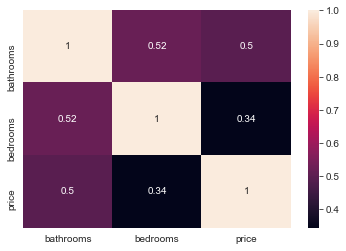

In [156]:
sns.heatmap(data[["bathrooms","bedrooms","price"]].corr(method="spearman"),annot=True)

In [157]:
data["rooms"]= data["bathrooms"]+data["bedrooms"]
data["rooms"]

0        4.00
1        5.25
2        3.00
3        7.00
4        5.00
         ... 
21592    5.50
21593    6.50
21594    2.75
21595    5.50
21596    2.75
Name: rooms, Length: 21597, dtype: float64

<AxesSubplot:>

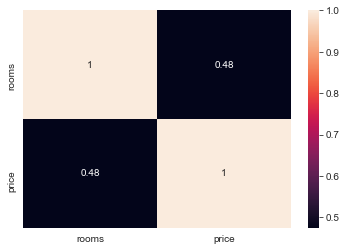

In [158]:
sns.heatmap(data[["rooms","price"]].corr(method="spearman"),annot=True)

Resulted in value ending in between what the correlation was when separate. It should not have an impact later on our model too much.

In [159]:
data.drop(["bathrooms","bedrooms"], axis=1, inplace=True)
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650     1.0           0     0          3   
1   12/9/14         2570      7242     2.0           0     0          3   

   grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0      7        1180              0      1955             0    98178  47.5112   
1      7        2170            400      1951          1991    98125  47.7210   

      long  sqft_living15  sqft_lot15   price  rooms  
0 -122.257           1340        5650  221900   4.00  
1 -122.319           1690        7639  538000   5.25

'sqft_living' is the sum of 'sqft_above' and 'sqft_basement'. Lets check if we can delete 'sqft_above' and 'sqft_basement' and have 'sqft_living'  represent it

<AxesSubplot:>

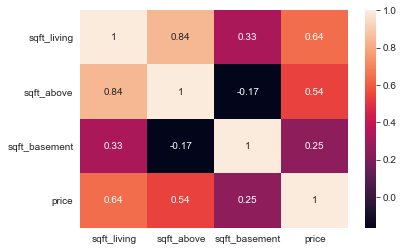

In [160]:
sns.heatmap(data[["sqft_living", "sqft_above", "sqft_basement", "price"]].corr(method="spearman"),annot=True)

In [161]:
data.drop(["sqft_above","sqft_basement"],axis=1,inplace=True)
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650     1.0           0     0          3   
1   12/9/14         2570      7242     2.0           0     0          3   

   grade  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      7      1955             0    98178  47.5112 -122.257           1340   
1      7      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15   price  rooms  
0        5650  221900   4.00  
1        7639  538000   5.25

The decimals for 'floors' and 'rooms' column is unessary. Change to Integer as follows. 

In [162]:
data['floors'] = data['floors'] .astype(int)

In [163]:
data['rooms'] = data['rooms'] .astype(int)

In [164]:
data.head(2)

date  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0  10/13/14         1180      5650       1           0     0          3   
1   12/9/14         2570      7242       2           0     0          3   

   grade  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      7      1955             0    98178  47.5112 -122.257           1340   
1      7      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15   price  rooms  
0        5650  221900      4  
1        7639  538000      5

### Lets split the 'date' column in to three parts: day, month and year and enrich data in this way.

In [165]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop(['date'], axis=1)

data.head(2)

sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0         1180      5650       1           0     0          3      7   
1         2570      7242       2           0     0          3      7   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15   price  rooms  year  month  day  
0        5650  221900      4  2014     10   13  
1        7639  538000      5  2014     12    9

### Convert 'long' column into positive values

In [166]:
data['long'] = (data['long'] + 180) % 360
data['long']

0        57.743
1        57.681
2        57.767
3        57.607
4        57.955
          ...  
21592    57.654
21593    57.638
21594    57.701
21595    57.931
21596    57.701
Name: long, Length: 21597, dtype: float64

Lets explore the data visually 

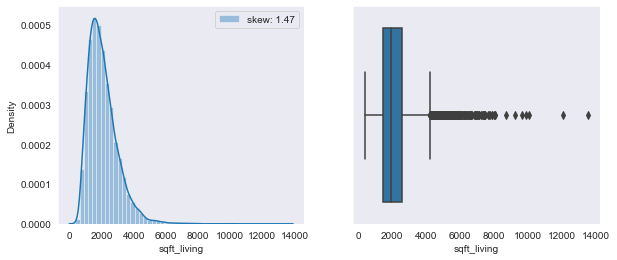

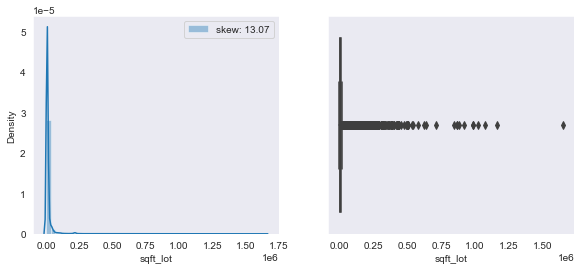

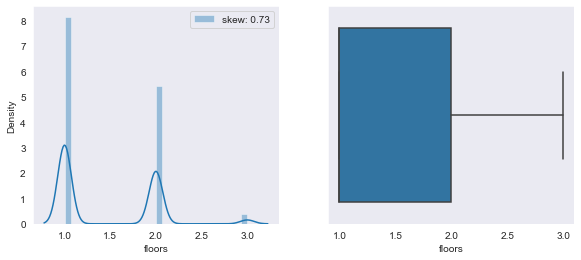

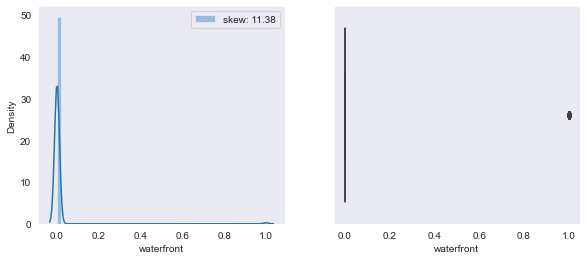

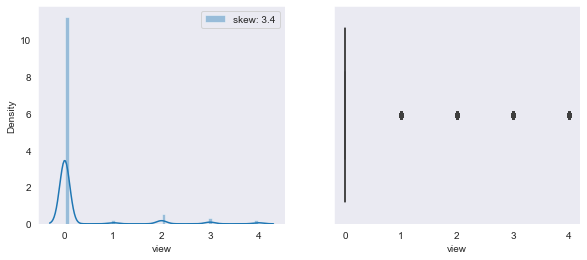

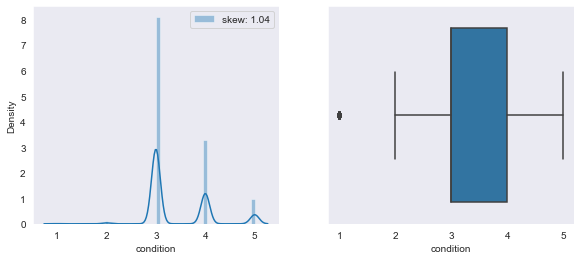

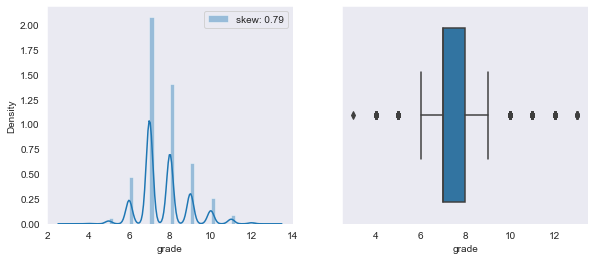

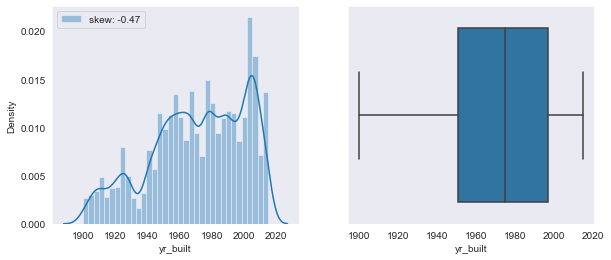

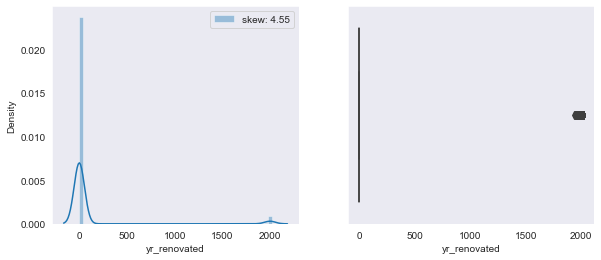

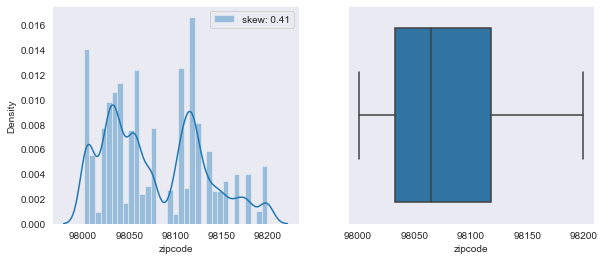

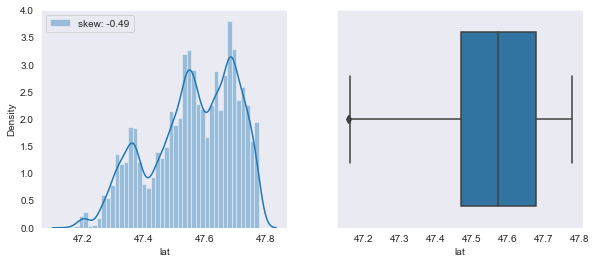

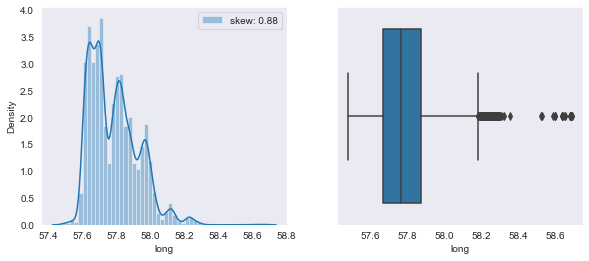

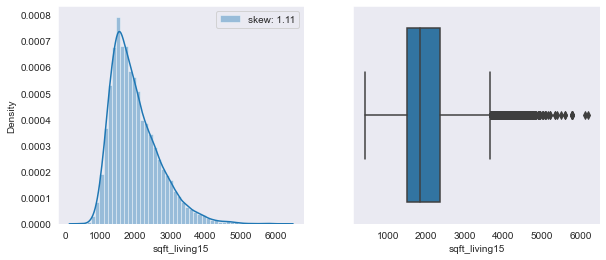

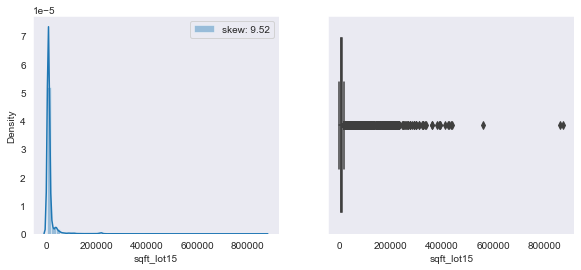

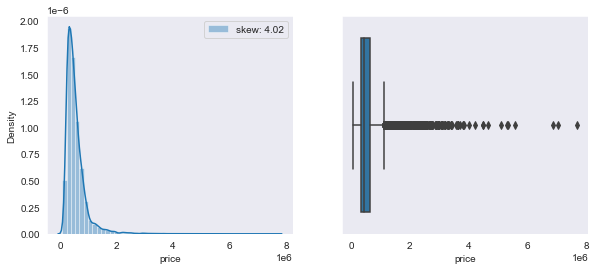

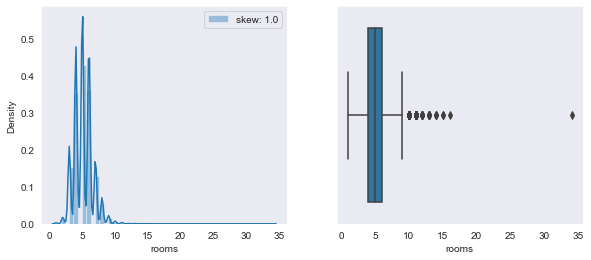

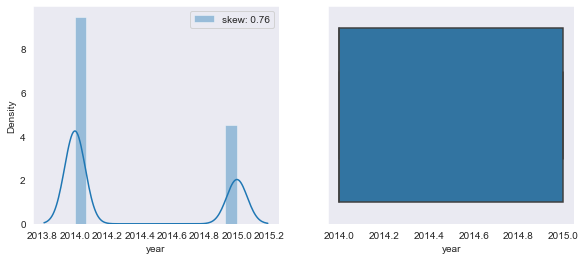

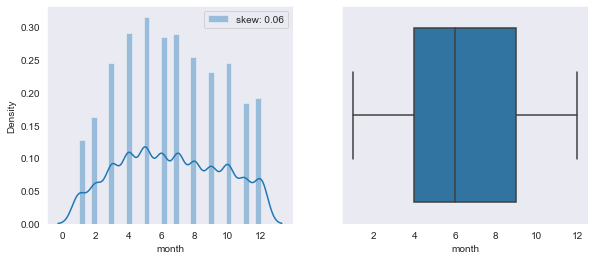

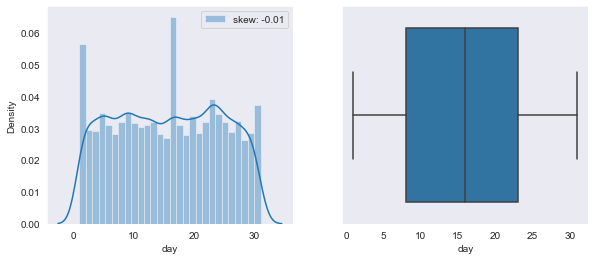

In [167]:
sns.set_style('dark')
for col in data:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(data[col])
    #plt.subplot(133)
    #stats.probplot(data[col], plot=plt)
    #plt.tight_layout()
    plt.show()

### We mostly have right skewed distribution in data except time data, and location data
### outliers are spotted, will address later on.

In [168]:
data.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_living15    0.585241
rooms            0.463766
view             0.397370
lat              0.306692
waterfront       0.266398
floors           0.237264
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
day             -0.014684
zipcode         -0.053402
Name: price, dtype: float64

In [169]:
    y = data['price']
    X = data.drop(['price'],axis=1)

In [170]:
def r_model (X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('Linear Regression:', r2_score(y_test, predictions))

    model = KNeighborsRegressor(n_neighbors=4)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('KNeighborsRegressor ', model.score(X_test, y_test))

    model = MLPRegressor()
    model.fit(X_train, y_train)
    expected_y  = y_test
    predicted_y = model.predict(X_test)
    print('MLP Regressor:',r2_score(expected_y, predicted_y))

In [171]:
r_model(X,y)

Linear Regression: 0.6906988668390674
KNeighborsRegressor  0.49698902101875186
MLP Regressor: 0.582065984192647


See the predicted versus actual prices using the Linear regression model as its most acurate

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test})
compare.head(10)

Prediction  Test Data
19317  225500.711898     289000
13025  609236.467789     500000
9602   479894.411151     350000
9727   360716.857323     292000
1088   477044.028961     385000
4559    71353.831960     100000
20049  417944.429455     475000
9950   356478.581159     440000
8684   497226.321822     557800
10269  463286.015989     550000

Lets address the outliers and see if this has a positive effect on the model

IQR method

def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

data = remove_outliers(data, threshold=1.5, in_columns=['x', 'x'])

// method not effective in our dataset - explore in future work //

z method

z = np.abs(stats.zscore(data))
z

threshold = 3
np.where(z > 3)

data = data[(z < 3).all(axis=1)]

// method did not work - explore in future work //

winsorize method

In [173]:
data1 = data.copy()

In [174]:
features = ['sqft_living', 'sqft_lot', 'grade', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'rooms']

In [175]:
def percentile_capping(data1, cols, from_low_end, from_high_end):
    
    for col in cols:
        stats.mstats.winsorize(a=data1[col], limits=(from_low_end, from_high_end), inplace=True)

In [176]:
percentile_capping(data1, features, 0, 0.03)

In [177]:
data.describe()

sqft_living      sqft_lot        floors    waterfront          view  \
count  21597.000000  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean    2080.321850  1.509941e+04      1.445988      0.007547      0.234292   
std      918.106125  4.141264e+04      0.551658      0.086549      0.766390   
min      370.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1430.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.000000      0.000000      0.000000   
75%     2550.000000  1.068500e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.000000      1.000000      4.000000   

          condition         grade      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       3.409825      7.657915   1970.999676     84.464787  98077.951845   
std        0.650546      1.173200     29.375234    401.821438     53.513072   
min        1.000000      3.000000   1900.000000      0.000000  98001.000000   
25%        3.000000      7.000000   1951.000000      0.000000  98033.000000   
50%        3.000000      7.000000   1975.000000      0.000000  98065.000000   
75%        4.000000      8.000000   1997.000000      0.000000  98118.000000   
max        5.000000     13.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15         price  \
count  21597.000000  21597.000000   21597.000000   21597.000000  2.159700e+04   
mean      47.560093     57.786018    1986.620318   12758.283512  5.402966e+05   
std        0.138552      0.140724     685.230472   27274.441950  3.673681e+05   
min       47.155900     57.481000     399.000000     651.000000  7.800000e+04   
25%       47.471100     57.672000    1490.000000    5100.000000  3.220000e+05   
50%       47.571800     57.769000    1840.000000    7620.000000  4.500000e+05   
75%       47.678000     57.875000    2360.000000   10083.000000  6.450000e+05   
max       47.777600     58.685000    6210.000000  871200.000000  7.700000e+06   

              rooms          year         month           day  
count  21597.000000  21597.000000  21597.000000  21597.000000  
mean       5.123860   2014.322962      6.573969     15.687457  
std        1.424972      0.467619      3.115061      8.634890  
min        1.000000   2014.000000      1.000000      1.000000  
25%        4.000000   2014.000000      4.000000      8.000000  
50%        5.000000   2014.000000      6.000000     16.000000  
75%        6.000000   2015.000000      9.000000     23.000000  
max       34.000000   2015.000000     12.000000     31.000000

In [178]:
data1.describe()

sqft_living      sqft_lot        floors    waterfront          view  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean    2055.846321  11437.254850      1.445988      0.007547      0.234292   
std      832.178240  13318.079263      0.551658      0.086549      0.766390   
min      370.000000    520.000000      1.000000      0.000000      0.000000   
25%     1430.000000   5040.000000      1.000000      0.000000      0.000000   
50%     1910.000000   7618.000000      1.000000      0.000000      0.000000   
75%     2550.000000  10685.000000      2.000000      0.000000      0.000000   
max     4140.000000  67475.000000      3.000000      1.000000      4.000000   

          condition         grade      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       3.409825      7.629393   1970.999676     84.464787  98077.951845   
std        0.650546      1.096173     29.375234    401.821438     53.513072   
min        1.000000      3.000000   1900.000000      0.000000  98001.000000   
25%        3.000000      7.000000   1951.000000      0.000000  98033.000000   
50%        3.000000      7.000000   1975.000000      0.000000  98065.000000   
75%        4.000000      8.000000   1997.000000      0.000000  98118.000000   
max        5.000000     10.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15    sqft_lot15         price  \
count  21597.000000  21597.000000   21597.000000  21597.000000  2.159700e+04   
mean      47.560093     57.783430    1972.333657  10267.649211  5.223177e+05   
std        0.138552      0.133073     641.646099  10272.769816  2.792609e+05   
min       47.155900     57.481000     399.000000    651.000000  7.800000e+04   
25%       47.471100     57.672000    1490.000000   5100.000000  3.220000e+05   
50%       47.571800     57.769000    1840.000000   7620.000000  4.500000e+05   
75%       47.678000     57.875000    2360.000000  10083.000000  6.450000e+05   
max       47.777600     58.095000    3560.000000  51400.000000  1.390000e+06   

              rooms          year         month           day  
count  21597.000000  21597.000000  21597.000000  21597.000000  
mean       5.094921   2014.322962      6.573969     15.687457  
std        1.328716      0.467619      3.115061      8.634890  
min        1.000000   2014.000000      1.000000      1.000000  
25%        4.000000   2014.000000      4.000000      8.000000  
50%        5.000000   2014.000000      6.000000     16.000000  
75%        6.000000   2015.000000      9.000000     23.000000  
max        8.000000   2015.000000     12.000000     31.000000

Capping Seems to have worked looking at the max values.
lets plot this visually too.

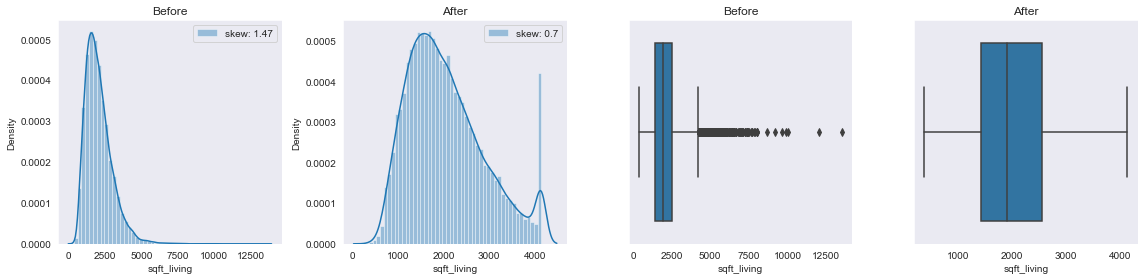

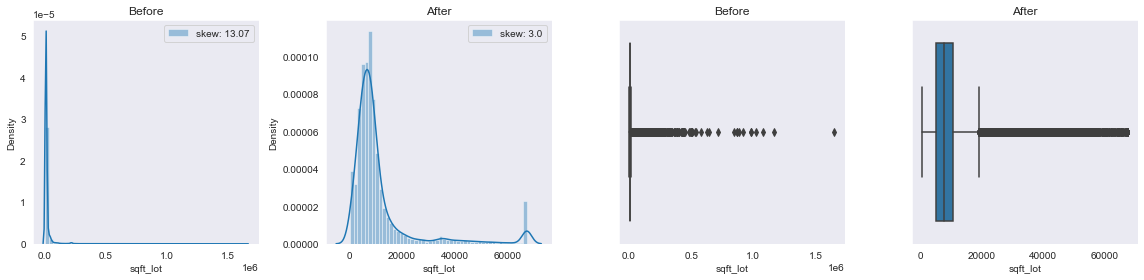

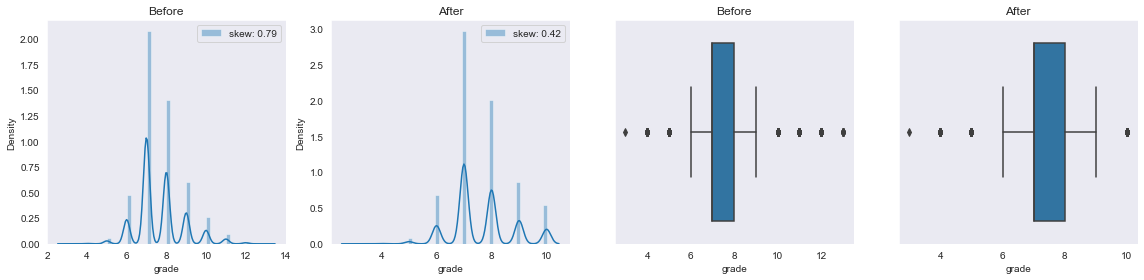

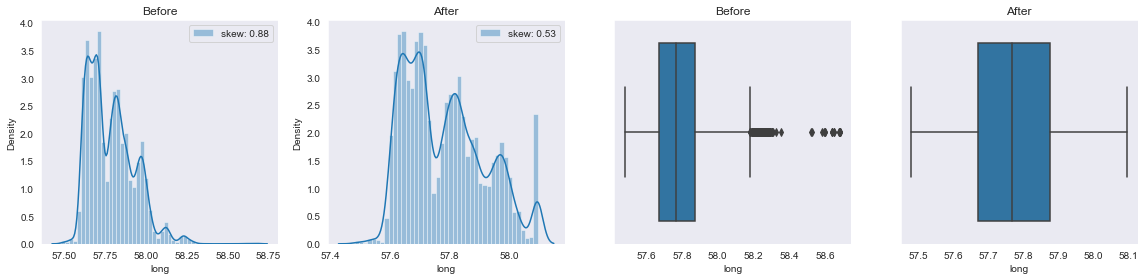

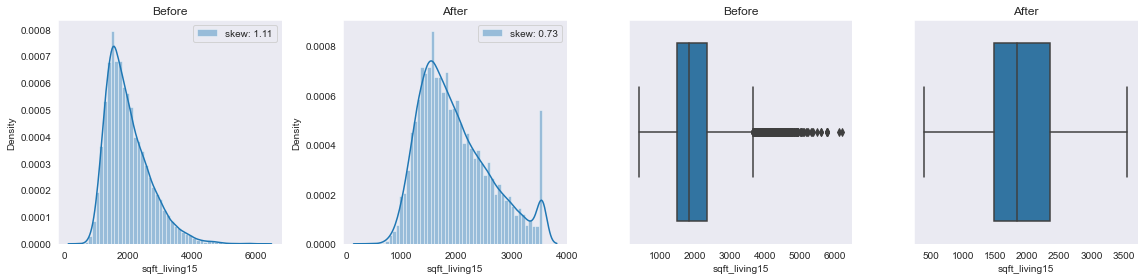

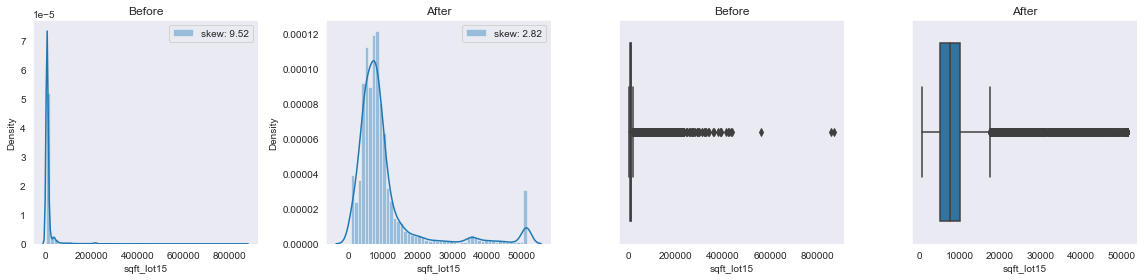

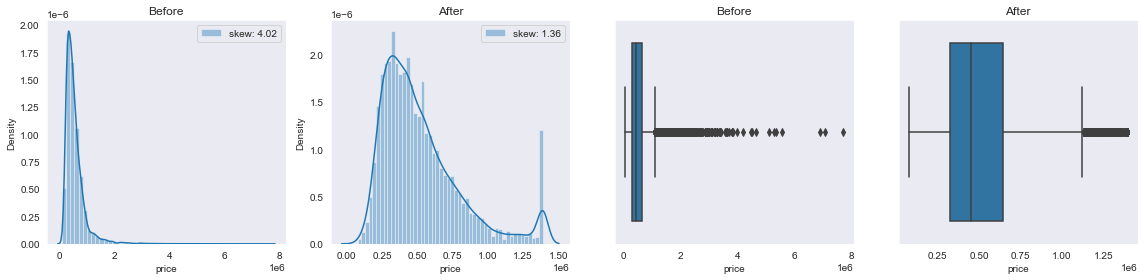

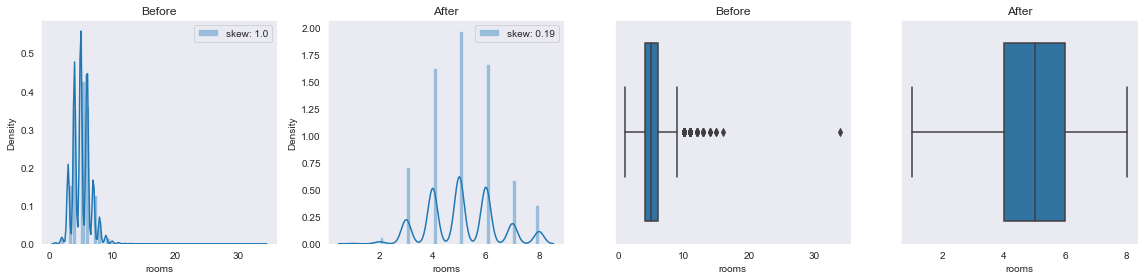

In [179]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(data[col], label="skew: " + str(np.round(data[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(data1[col], label="skew: " + str(np.round(data1[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(data[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(data1[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()


outliers look better as well as distribution for some columns that were righ skewed

Running the models again after addressing outliers and in turn distribution

In [180]:
y = data1['price']
X = data1.drop(['price'],axis=1)

In [181]:
def r_model (X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('Linear Regression:', r2_score(y_test, predictions))

    model = KNeighborsRegressor(n_neighbors=4)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('KNeighborsRegressor ', model.score(X_test, y_test))

    model = MLPRegressor()
    model.fit(X_train, y_train)
    expected_y  = y_test
    predicted_y = model.predict(X_test)
    print('MLP Regressor:',r2_score(expected_y, predicted_y))

In [182]:
r_model(X,y)

Linear Regression: 0.7390287131069785
KNeighborsRegressor  0.522086398863423
MLP Regressor: 0.5734807231730057


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test})
compare.head(10)

Prediction  Test Data
19317  258737.748849     289000
13025  577715.017702     500000
9602   481679.144145     350000
9727   366133.102288     292000
1088   488236.258700     385000
4559   113136.188159     100000
20049  446558.180201     475000
9950   395540.554433     440000
8684   506909.685900     557800
10269  478142.336119     550000

## CONCLUSION:

In [184]:
data.head()

sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0         1180      5650       1           0     0          3      7   
1         2570      7242       2           0     0          3      7   
2          770     10000       1           0     0          3      6   
3         1960      5000       1           0     0          5      7   
4         1680      8080       1           0     0          3      8   

   yr_built  yr_renovated  zipcode      lat    long  sqft_living15  \
0      1955             0    98178  47.5112  57.743           1340   
1      1951          1991    98125  47.7210  57.681           1690   
2      1933             0    98028  47.7379  57.767           2720   
3      1965             0    98136  47.5208  57.607           1360   
4      1987             0    98074  47.6168  57.955           1800   

   sqft_lot15   price  rooms  year  month  day  
0        5650  221900      4  2014     10   13  
1        7639  538000      5  2014     12    9  
2        8062  180000      3  2015      2   25  
3        5000  604000      7  2014     12    9  
4        7503  510000      5  2015      2   18

## Future work:

In [185]:
- try transform data with techniques like log, boxcox, scaling see how effect the model
- Try to convert some column to categorical ones and run the model again (which and why) - example waterfront,view,condition
- undestand the statistical relevancy and relationship of data better
- better functions to automate code and displaying results/ tables 

SyntaxError: invalid syntax (<ipython-input-185-560188000dcc>, line 1)